In [1]:
import numpy as np
import pandas as pd

data = pd.read_csv('../../Dataset/Kaggle/kc_house_data.csv')
data = data.head(10)
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


Predict the house price using area of the house living

Text(0.5, 1.0, 'Price vs Area of the House_living                    ')

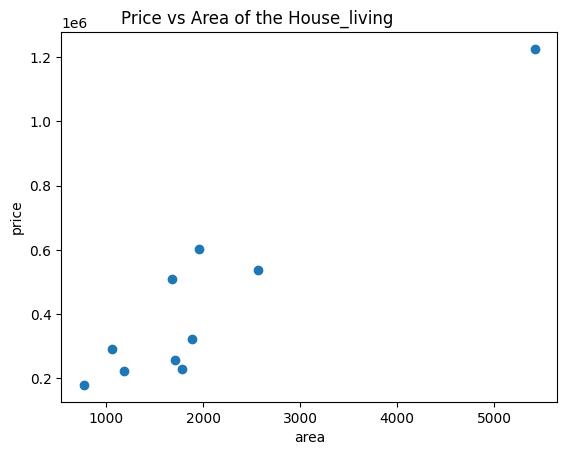

In [2]:
y=data.price
x=data['sqft_living']
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.xlabel('area')
plt.ylabel('price')
plt.title('Price vs Area of the House_living                    ')



In [3]:
#Linear regression y=mx+c

#mean
mean_x = np.mean(x)
mean_y = np.mean(y)
# covariance of x & y
cov_xy = np.mean((x-mean_x)*(y-mean_y))
# variance of x
var_x = np.mean((x-mean_x)**2) 
# slope/gradient m
m = cov_xy/var_x
# y-intercept c
c = mean_y - m*mean_x

print("slope : ",m)
print("y-intercept : ",c)

y_pred = m*x + c

print("predicted values : \n", y_pred.astype('int'))

slope :  225.66344899088656
y-intercept :  -13816.056604250334
predicted values : 
 0     252466
1     566139
2     159944
3     428484
4     365298
5    1209279
6     373196
7     225387
8     387864
9     412687
Name: sqft_living, dtype: int64


In [4]:
#model accuray - r^2
ss_res = np.sum((y-y_pred)**2)
ss_tot = np.sum((y-np.mean(y))**2)

r2_score = 1-(ss_res/ss_tot)

print("model accuracy :",(r2_score*100).round(2),"%")

model accuracy : 88.14 %


In [5]:
#give your values to see the result

area = int(input("Enter the area of the house"))

predicted_price = m * area + c

print("Price of your house : ", predicted_price)

Price of your house :  2766583.298412463


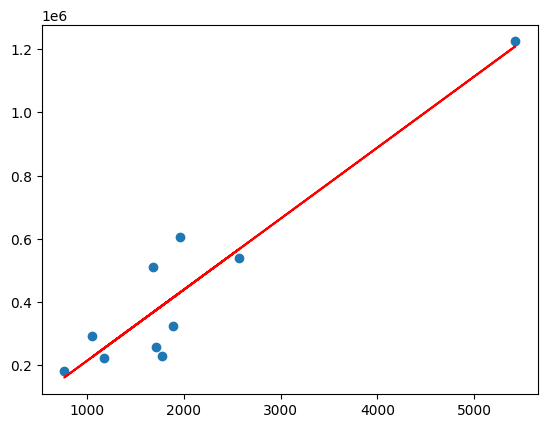

In [6]:
#model result plot

plt.scatter(x,y)
plt.plot(x,y_pred,color='red')


using sklearn lib


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

x=x.values.reshape(-1,1)

model = LinearRegression()
model.fit(x,y)
y_pred = model.predict(x)

print("Accuracy : ", r2_score(y,y_pred))

Accuracy :  0.8814390403544212
